# Data Analysis Notebook
This notebook demonstrates the data analysis of the cleaned student dataset.

In [4]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Add src directory to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from analysis import DataAnalyzer

## Load and Initialize Data

In [6]:
# Initialize the analyzer with cleaned data
input_path = '../data/students_cleaned.csv'
analyzer = DataAnalyzer(input_path)

# Get the dataframe
df = analyzer.df

# Display basic information
print("Dataset Info:")
df.info()

# Display first few rows
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          500 non-null    object 
 1   first_name          495 non-null    object 
 2   last_name           493 non-null    object 
 3   gender              500 non-null    object 
 4   email               500 non-null    object 
 5   age                 500 non-null    int64  
 6   study_hours         500 non-null    float64
 7   quiz_participation  500 non-null    float64
 8   past_performance    500 non-null    float64
 9   course_completion   500 non-null    bool   
 10  study_hours_norm    500 non-null    float64
 11  engagement          500 non-null    float64
 12  age_bucket          500 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 47.5+ KB


,student_id,first_name,last_name,gender,email,age,study_hours,quiz_participation,past_performance,course_completion,study_hours_norm,engagement,age_bucket
0,S001,Benjamin,Kiernan,Male,x001@student.ncirl.ie,20,12.14,89.0,95.0,False,0.513428,0.664057,19-24
1,S002,Callan,McVicker,Male,x002@student.ncirl.ie,25,9.37,86.9,56.0,True,0.396278,0.585367,25-34
2,S003,Fintan,Deere,Male,x003@student.ncirl.ie,20,12.79,82.7,60.0,False,0.540918,0.655351,19-24
3,S004,Sorcha,Cally,Female,x004@student.ncirl.ie,21,9.28,65.6,57.0,False,0.392472,0.497883,19-24
4,S005,Kane,Swift,Male,x005@student.ncirl.ie,29,7.78,95.8,51.0,True,0.329034,0.580620,25-34


## Basic Statistics

In [7]:
# Get basic statistics
print("Basic Statistics:")
df.describe(include='all')

Basic Statistics:


,student_id,first_name,last_name,gender,email,age,study_hours,quiz_participation,past_performance,course_completion,study_hours_norm,engagement,age_bucket
count,500,495,493,500,500,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000,500
unique,500,362,441,3,500,NaN,NaN,NaN,NaN,2,NaN,NaN,2
top,S001,Clifford,MacMullen,Male,x001@student.ncirl.ie,NaN,NaN,NaN,NaN,True,NaN,NaN,19-24
freq,1,4,3,256,1,NaN,NaN,NaN,NaN,344,NaN,NaN,417
mean,NaN,NaN,NaN,NaN,NaN,22.152000,9.968990,74.767600,69.046000,NaN,0.421611,0.552037,NaN
std,NaN,NaN,NaN,NaN,NaN,2.131192,4.712742,17.161726,18.600102,NaN,0.199312,0.139060,NaN
min,NaN,NaN,NaN,NaN,NaN,19.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.000000,7.220000,63.775000,59.000000,NaN,0.305350,0.470997,NaN
50%,NaN,NaN,NaN,NaN,NaN,22.000000,9.825000,75.500000,70.000000,NaN,0.415521,0.548850,NaN
75%,NaN,NaN,NaN,NaN,NaN,24.000000,12.695000,87.900000,81.250000,NaN,0.536900,0.630971,NaN


## Grade Distribution Analysis

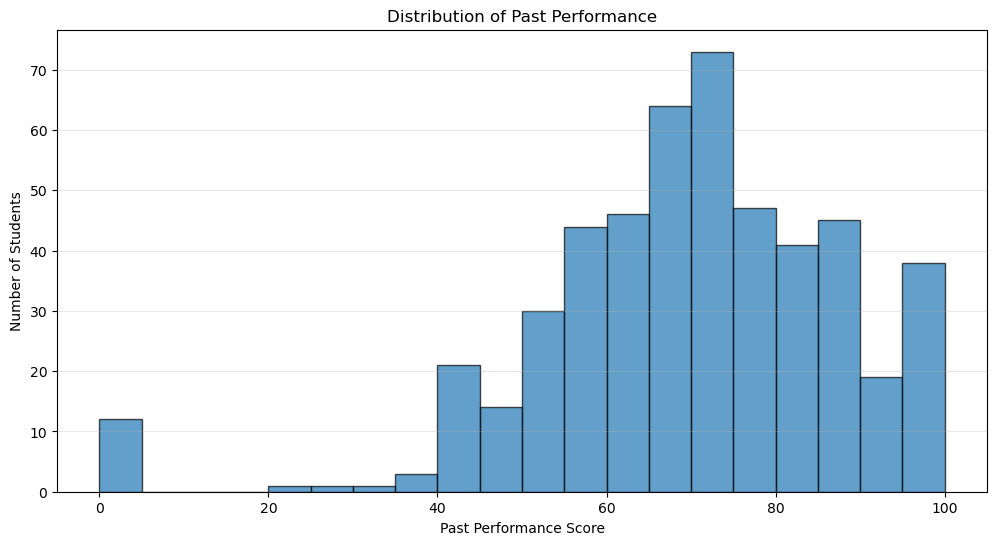

In [19]:
# Visualize past_performance distribution (histogram)
plt.figure(figsize=(12, 6))
plt.hist(df['past_performance'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Past Performance')
plt.xlabel('Past Performance Score')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Performance by Gender

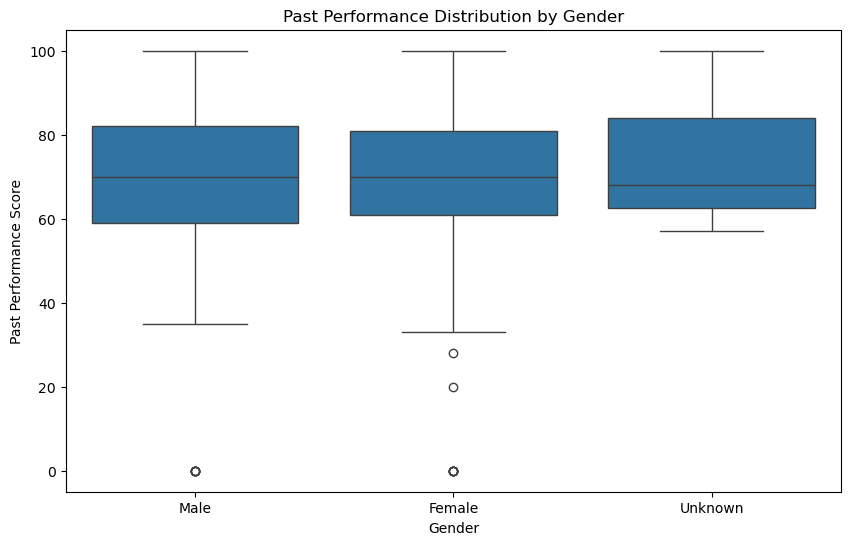

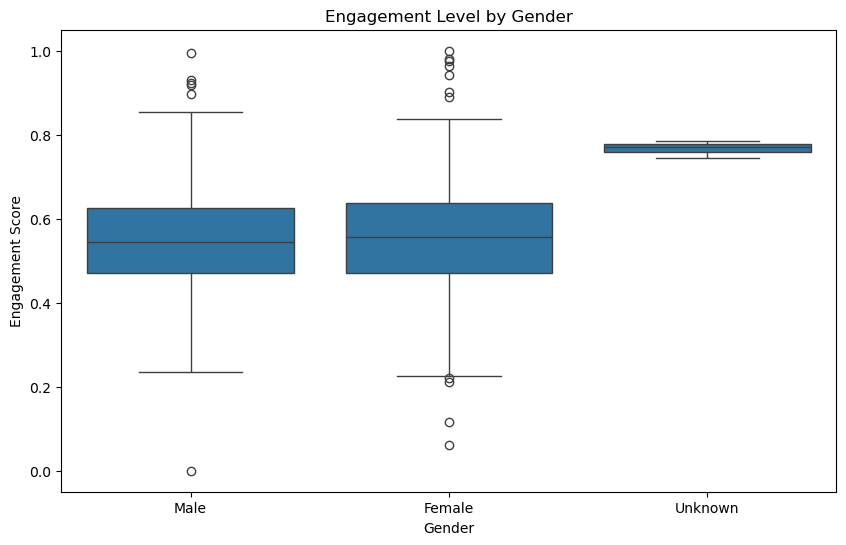

In [14]:
# For past performance by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='past_performance')
plt.title('Past Performance Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Past Performance Score')
plt.show()

# For engagement by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='engagement')
plt.title('Engagement Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Engagement Score')
plt.show()

## Correlation Analysis

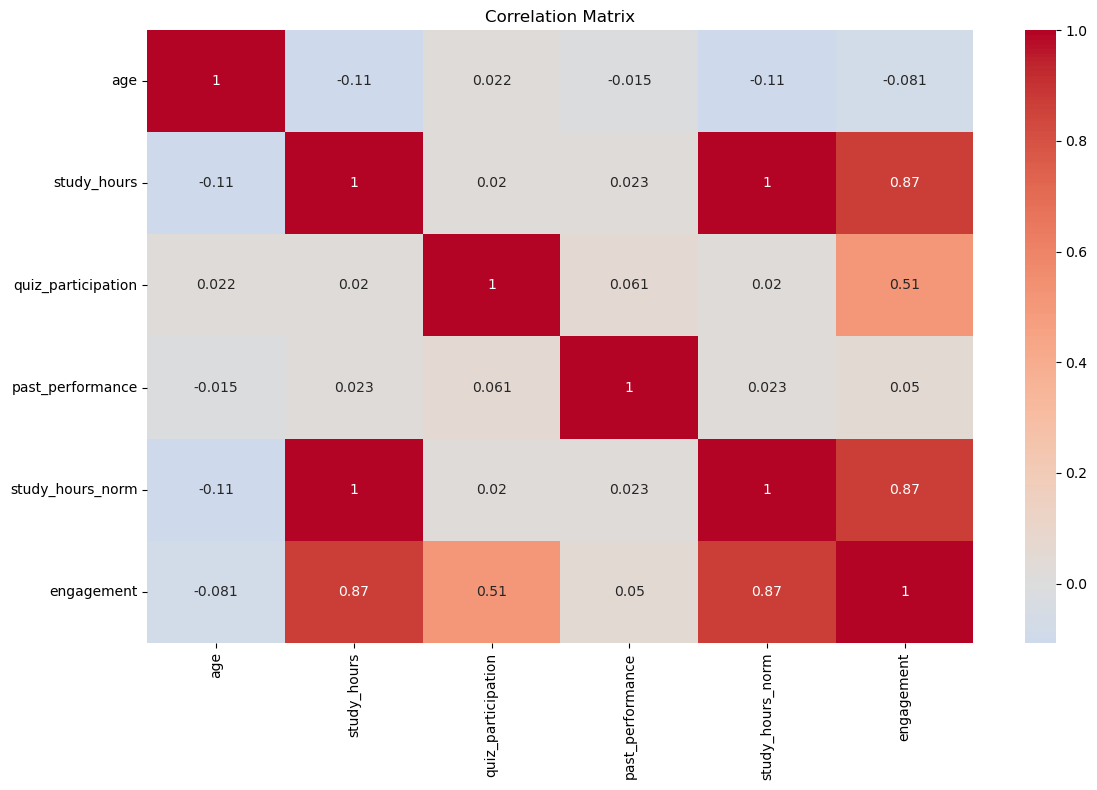

In [12]:
# Calculate correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Top Performing Students

In [17]:
# First, check available columns in your dataset
print("Available columns:", df.columns.tolist())

# Display top 10 students by past_performance (highest numeric column)
top_students = df.nlargest(10, 'past_performance')
print("Top 10 Students by Past Performance:")
print(top_students[['student_id', 'first_name', 'last_name', 'past_performance']])

Available columns: ['student_id', 'first_name', 'last_name', 'gender', 'email', 'age', 'study_hours', 'quiz_participation', 'past_performance', 'course_completion', 'study_hours_norm', 'engagement', 'age_bucket']
Top 10 Students by Past Performance:
    student_id first_name   last_name  past_performance
11        S012    Yasmine      Mulvin             100.0
24        S025     Shanna      Pinder             100.0
27        S028       Alan       McNee             100.0
58        S059      Jemma    Monaghan             100.0
64        S065     Robert  McGoldrick             100.0
97        S098     Eamonn     Maughan             100.0
135       S136        Amy     McGrory             100.0
143       S144      Kathy     Kinnear             100.0
186       S187   Diarmuid      Coonan             100.0
196       S197     Alanis      McDaid             100.0
